<a href="https://colab.research.google.com/github/Jbaruz/supervised_learning/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#Load and Prprocess th data
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()


Saving student-por.csv to student-por.csv


In [ ]:
# LOAD & CHECK THE DATA
# Have to use delimeter at the end
df_juan = pd.read_csv('student-por.csv', delimiter=';')
df_juan

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
# 2. Carryout some initial investigations:
# check the column names
df_juan.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df_juan.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
df_juan.shape

(649, 33)

In [ ]:
df_juan.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
df_juan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df_juan.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [ ]:
df_juan.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
def column_summary(df_juan):
    summary_data = []

    for col_name in df_juan.columns:
        col_dtype = df_juan[col_name].dtype
        num_of_nulls = df_juan[col_name].isnull().sum()
        num_of_non_nulls = df_juan[col_name].notnull().sum()
        num_of_distinct_values = df_juan[col_name].nunique()

        if num_of_distinct_values <= 10:
            distinct_values_counts = df_juan[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df_juan[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Example usage:
# Assuming df is your DataFrame
summary_df = column_summary(df_juan)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,school,object,0,649,2,"{'GP': 423, 'MS': 226}"
1,sex,object,0,649,2,"{'F': 383, 'M': 266}"
2,age,int64,0,649,8,"{17: 179, 16: 177, 18: 140, 15: 112, 19: 32, 2..."
3,address,object,0,649,2,"{'U': 452, 'R': 197}"
4,famsize,object,0,649,2,"{'GT3': 457, 'LE3': 192}"
5,Pstatus,object,0,649,2,"{'T': 569, 'A': 80}"
6,Medu,int64,0,649,5,"{2: 186, 4: 175, 1: 143, 3: 139, 0: 6}"
7,Fedu,int64,0,649,5,"{2: 209, 1: 174, 3: 131, 4: 128, 0: 7}"
8,Mjob,object,0,649,5,"{'other': 258, 'services': 136, 'at_home': 135..."
9,Fjob,object,0,649,5,"{'other': 367, 'services': 181, 'at_home': 42,..."


In [ ]:
# Gets additional value such as min / median / max etc.
def column_summary_plus(df_juan):
    result_df = pd.DataFrame(columns=['col_name', 'col_dtype', 'num_distinct_values',
                                      'min_value', 'max_value',
                                      'median_no_na', 'average_no_na','average_non_zero',
                                      'null_present', 'nulls_num', 'non_nulls_num',
                                      'distinct_values'])

    # Loop through each column in the DataFrame
    for column in df_juan.columns:
        print(f"Start processing {column} col with {df[column].dtype} dtype")
        # Get column dtype
        col_dtype = df_juan[column].dtype
        # Get distinct values and their counts
        value_counts = df_juan[column].value_counts()
        distinct_values = value_counts.index.tolist()
        # Get number of distinct values
        num_distinct_values = len(distinct_values)
        # Get min and max values
        sorted_values = sorted(distinct_values)
        min_value = sorted_values[0] if sorted_values else None
        max_value = sorted_values[-1] if sorted_values else None

        # Get median value
        non_distinct_val_list = sorted(df_juan[column].dropna().tolist())
        len_non_d_list = len(non_distinct_val_list)
        if len(non_distinct_val_list) == 0:
            median = None
        else:
            median = non_distinct_val_list[len_non_d_list//2]

        # Get average value if value is number
        if np.issubdtype(df_juan[column].dtype, np.number):
            if len(non_distinct_val_list) > 0:
                average = sum(non_distinct_val_list)/len_non_d_list
                non_zero_val_list = [v for v in non_distinct_val_list if v > 0]
                average_non_zero = sum(non_zero_val_list)/len_non_d_list
            else:
                average = None
                average_non_zero = None
        else:
            average = None
            average_non_zero = None

        # Check if null values are present
        null_present = 1 if df_juan[column].isnull().any() else 0

        # Get number of nulls and non-nulls
        num_nulls = df_juan[column].isnull().sum()
        num_non_nulls = df_juan[column].notnull().sum()

        # Distinct_values only take top 10 distinct values count
        top_10_d_v = value_counts.head(10).index.tolist()
        top_10_c = value_counts.head(10).tolist()
        top_10_d_v_dict = dict(zip(top_10_d_v,top_10_c))

        # Append the information to the result DataFrame
        result_df = result_df.append({'col_name': column, 'col_dtype': col_dtype, 'num_distinct_values': num_distinct_values,
                                      'min_value': min_value, 'max_value': max_value,
                                      'median_no_na': median, 'average_no_na': average, 'average_non_zero': average_non_zero,
                                      'null_present': null_present, 'nulls_num': num_nulls, 'non_nulls_num': num_non_nulls,
                                      'distinct_values': top_10_d_v_dict}, ignore_index=True)

    return result_df

# Example usage:
# Assuming df is your DataFrame
summary_df = column_summary(df_juan)
display(summary_df)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,school,object,0,649,2,"{'GP': 423, 'MS': 226}"
1,sex,object,0,649,2,"{'F': 383, 'M': 266}"
2,age,int64,0,649,8,"{17: 179, 16: 177, 18: 140, 15: 112, 19: 32, 2..."
3,address,object,0,649,2,"{'U': 452, 'R': 197}"
4,famsize,object,0,649,2,"{'GT3': 457, 'LE3': 192}"
5,Pstatus,object,0,649,2,"{'T': 569, 'A': 80}"
6,Medu,int64,0,649,5,"{2: 186, 4: 175, 1: 143, 3: 139, 0: 6}"
7,Fedu,int64,0,649,5,"{2: 209, 1: 174, 3: 131, 4: 128, 0: 7}"
8,Mjob,object,0,649,5,"{'other': 258, 'services': 136, 'at_home': 135..."
9,Fjob,object,0,649,5,"{'other': 367, 'services': 181, 'at_home': 42,..."


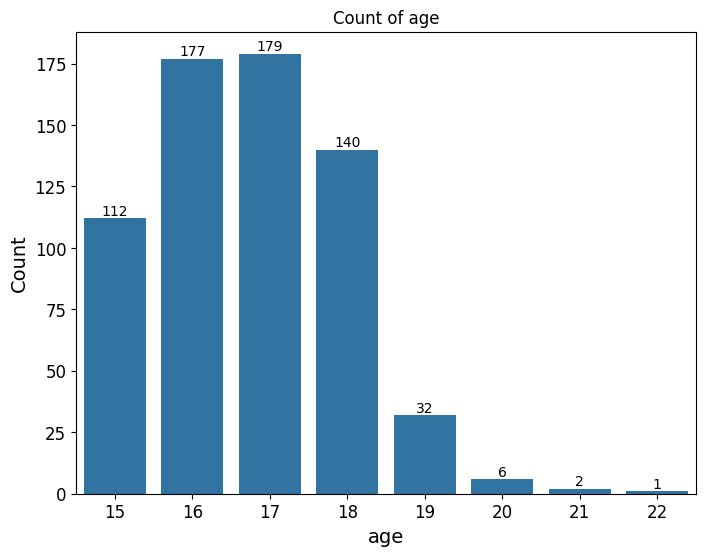

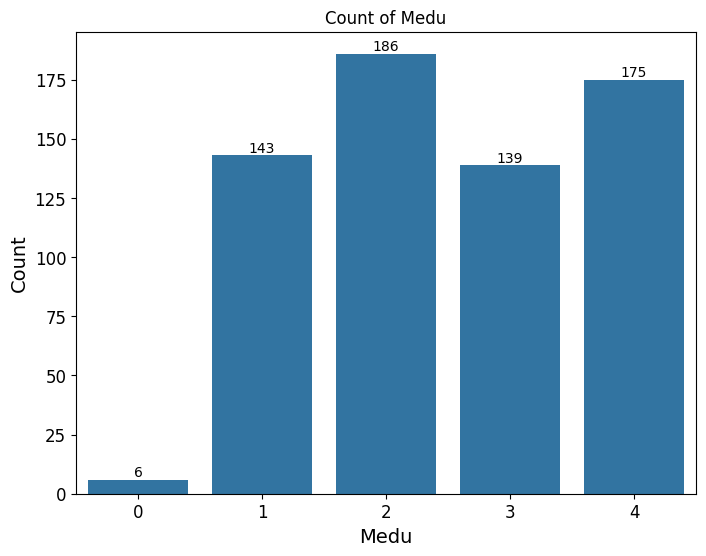

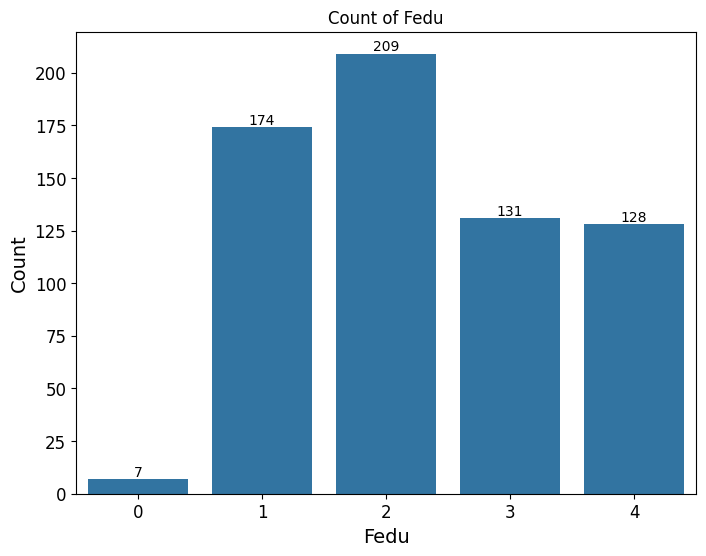

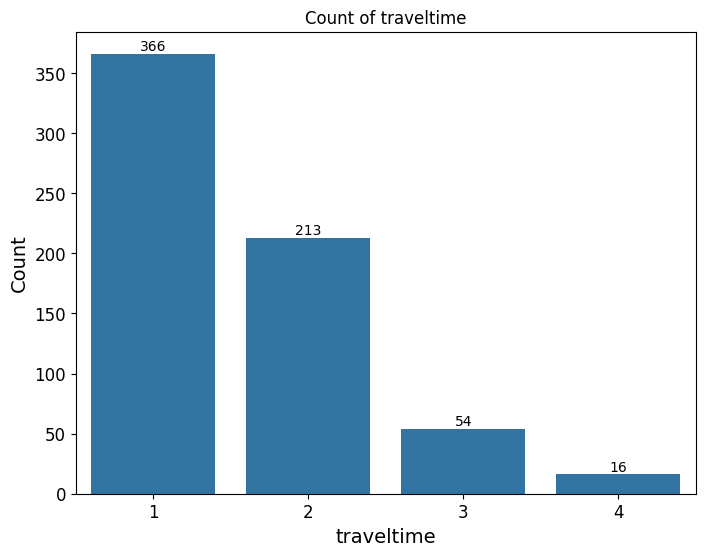

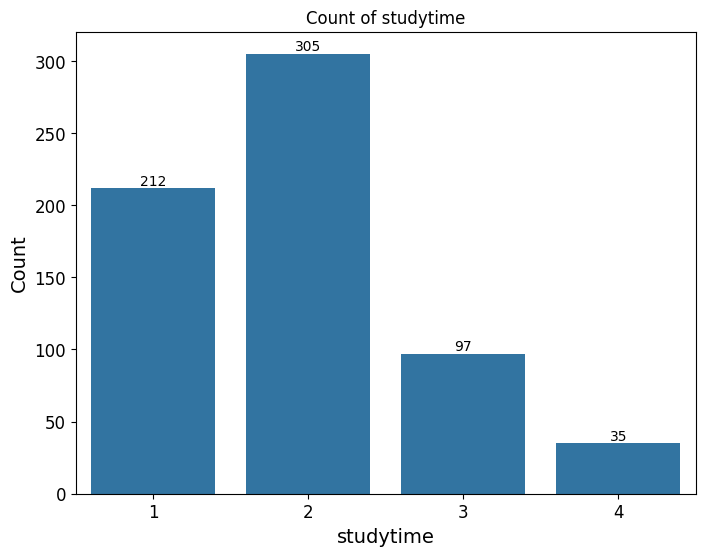

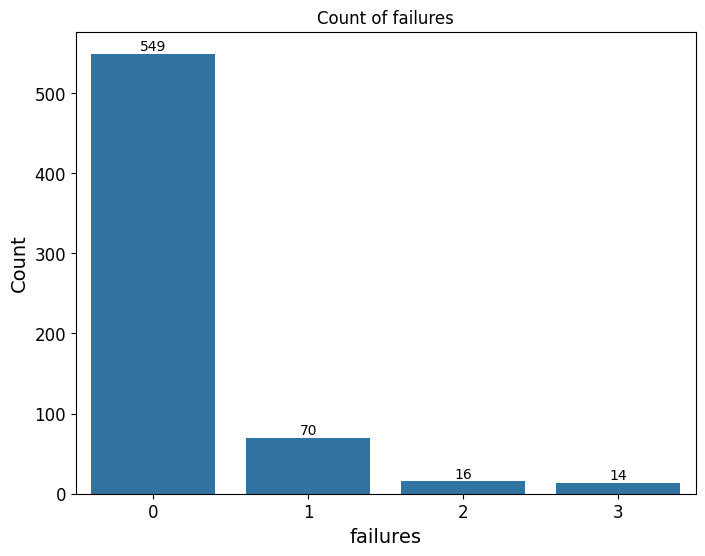

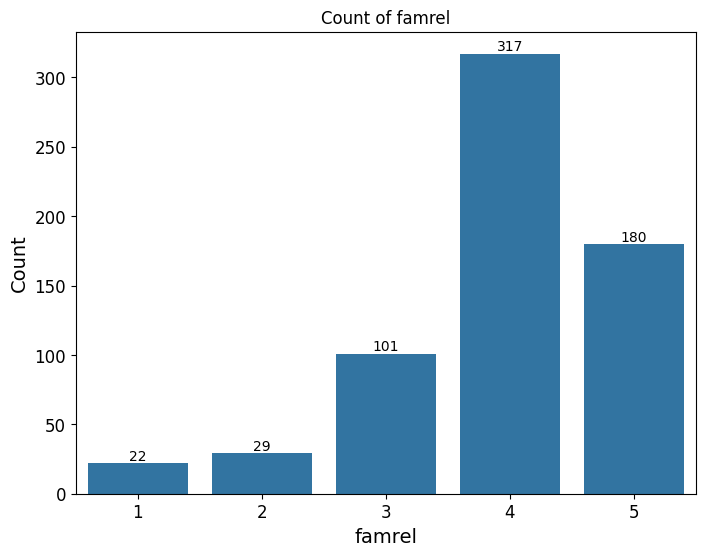

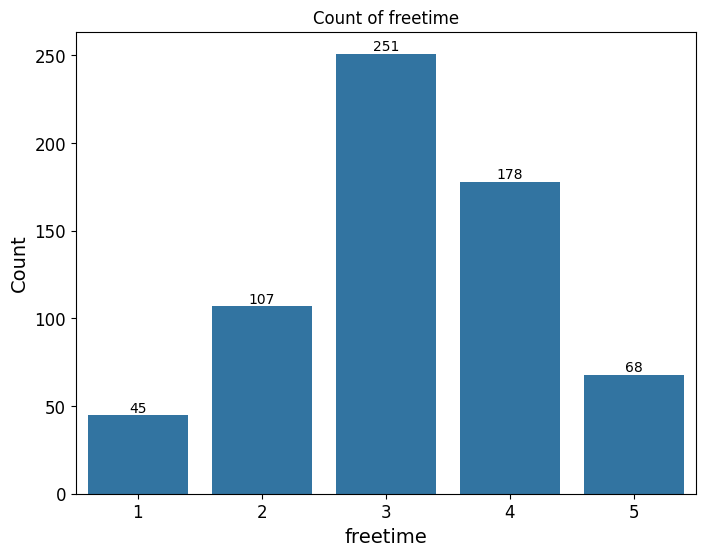

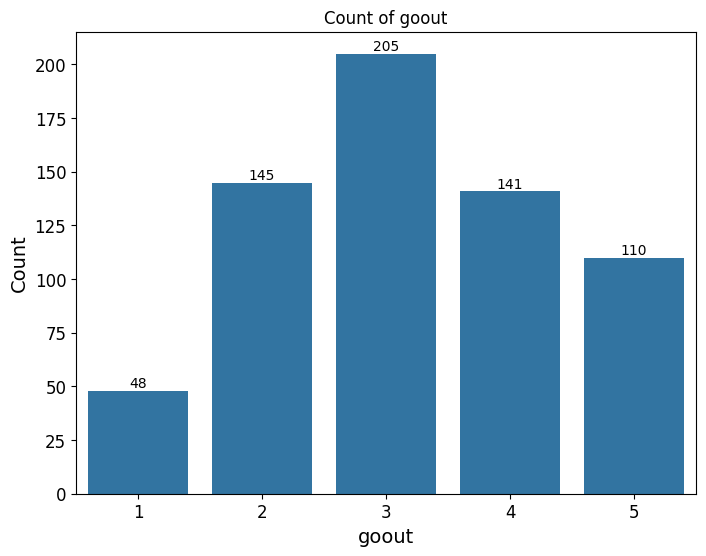

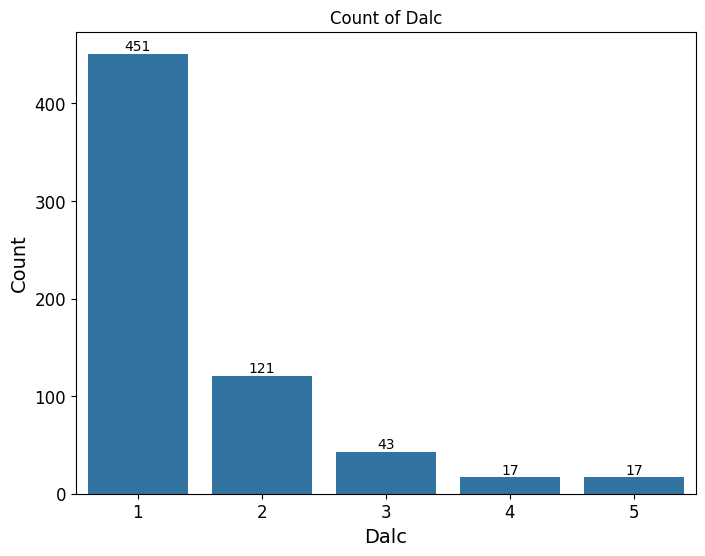

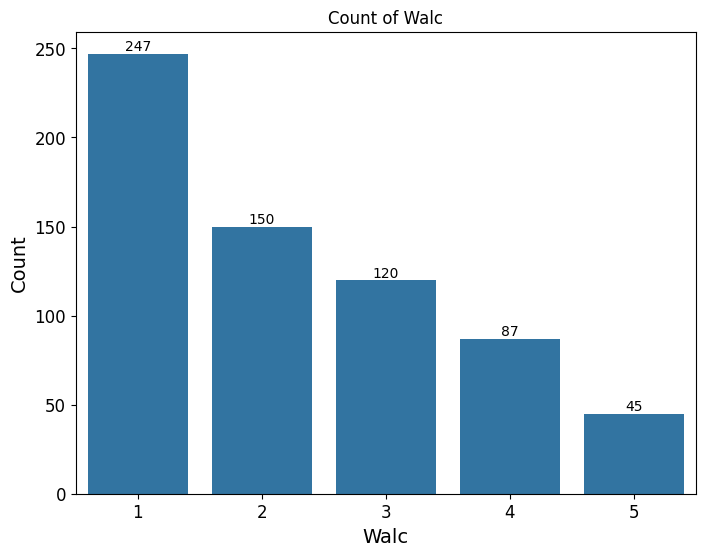

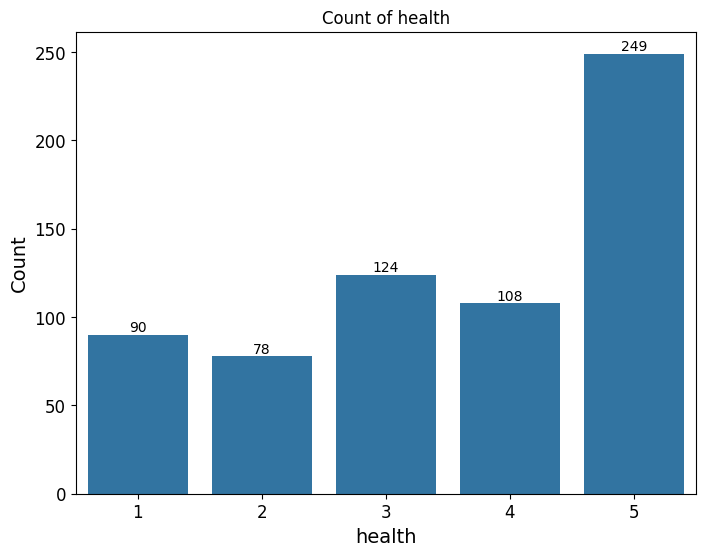

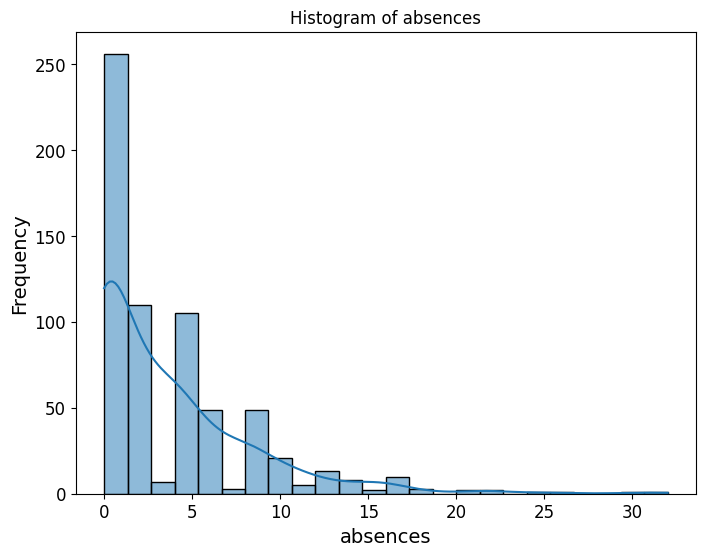

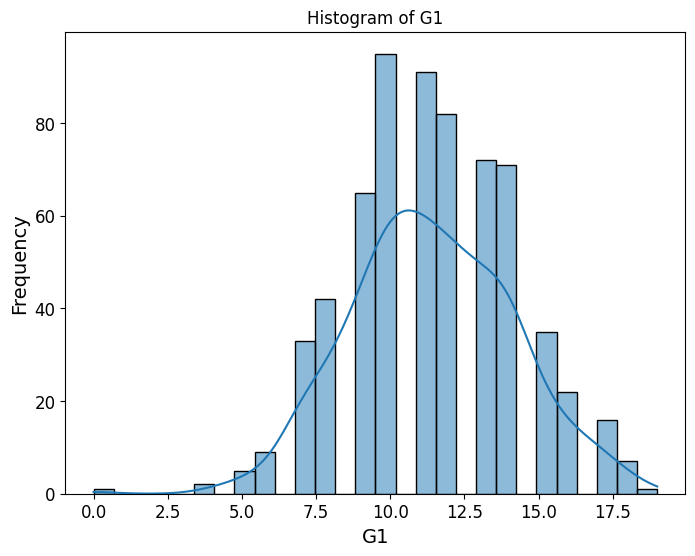

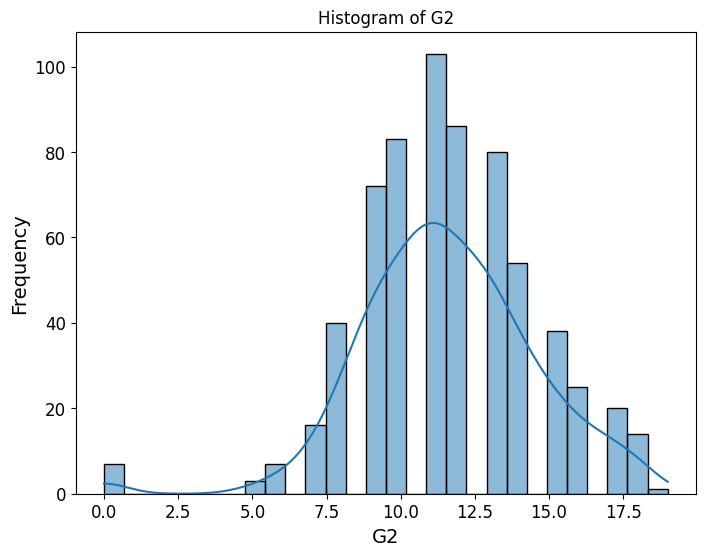

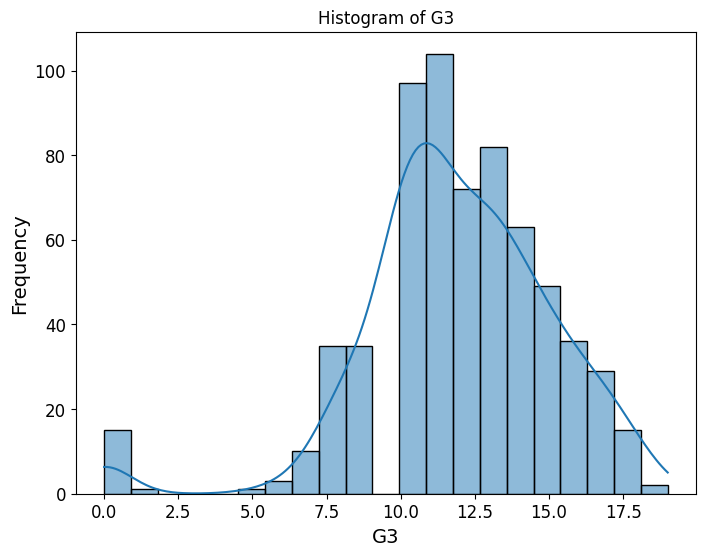

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numerical columns
numerical_columns = df_juan.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(df_juan[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
        plt.figure(figsize=(8, 6))
        sns.histplot(df_juan[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:  # For discrete or ordinal variables
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=column, data=df_juan)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')
        plt.show()

In [ ]:
# d. Check the categorical values.
print("\nUnique values for categorical fields: ")
categorical_columns = df_juan.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"{column}: {df_juan[column].unique()}")


Unique values for categorical fields: 
school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [ ]:
# For each column /Column type/Missing values/unique values/statistics
for column in df_juan.columns:
    print(f"\nColumn: {column}")

    # Check if column is numerical or categorical
    if df_juan[column].dtype == 'object':
        print("Type: Categorical")
        print("Unique values:", df_juan[column].unique())
    else:
        print("Type: Numerical")
        print("Statistics:")
        print(df_juan[column].describe())

    # Check for missing values
    print("Number of missing values:", df_juan[column].isnull().sum())


Column: school
Type: Categorical
Unique values: ['GP' 'MS']
Number of missing values: 0

Column: sex
Type: Categorical
Unique values: ['F' 'M']
Number of missing values: 0

Column: age
Type: Numerical
Statistics:
count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Number of missing values: 0

Column: address
Type: Categorical
Unique values: ['U' 'R']
Number of missing values: 0

Column: famsize
Type: Categorical
Unique values: ['GT3' 'LE3']
Number of missing values: 0

Column: Pstatus
Type: Categorical
Unique values: ['A' 'T']
Number of missing values: 0

Column: Medu
Type: Numerical
Statistics:
count    649.000000
mean       2.514638
std        1.134552
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
Number of missing values: 0

Column: Fedu
Type: Numerical
Statistics:
count

# PRE-PREPROCESS AND PREPARE THE DATA FOR MACHINE LEARNING

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# 3. Create a new target variable i.e column name it pass_juan
df_juan['pass_juan'] = (df_juan['G1'] + df_juan['G2'] + df_juan['G3'] >= 35).astype(int)
df_juan.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_juan
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


In [ ]:
# 4. Drop the columns G1, G2, G3, permanently.
df_juan.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)
df_juan.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass_juan
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [ ]:
# 5. Separate the features from the target variable
features_juan = df_juan.drop('pass_juan', axis=1)
target_variable_juan = df_juan['pass_juan']
features_juan.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [ ]:
# 6. Print out the total number of instances in each class
class_counts = target_variable_juan.value_counts()
print("\nTotal number of instances in each class:")
class_counts


Total number of instances in each class:


pass_juan
1    328
0    321
Name: count, dtype: int64

In [ ]:
# 7. Create two lists one to save the names of your numeric fields and on to save the names of your categorical fields.
numeric_features_juan = features_juan.select_dtypes(include=[np.number]).columns.tolist()
cat_features_juan = features_juan.select_dtypes(include=['object']).columns.tolist()
print("\nNumeric Features:")
print(numeric_features_juan)
print("\nCategorical Features:")
print(cat_features_juan)


Numeric Features:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Categorical Features:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [ ]:
# 8. Prepare a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features_juan),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_juan)])



In [ ]:
# 9. Prepare a classifier decision tree model
clf_juan = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
# 10. Build a pipeline
pipeline_juan = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', clf_juan)])

In [ ]:
# 11. Split you data into train 80% train and 20% test
X_train_juan, X_test_juan, y_train_juan, y_test_juan = train_test_split(features_juan, target_variable_juan, test_size=0.2, random_state=92)
class_counts, numeric_features_juan, cat_features_juan

(pass_juan
 1    328
 0    321
 Name: count, dtype: int64,
 ['age',
  'Medu',
  'Fedu',
  'traveltime',
  'studytime',
  'failures',
  'famrel',
  'freetime',
  'goout',
  'Dalc',
  'Walc',
  'health',
  'absences'],
 ['school',
  'sex',
  'address',
  'famsize',
  'Pstatus',
  'Mjob',
  'Fjob',
  'reason',
  'guardian',
  'schoolsup',
  'famsup',
  'paid',
  'activities',
  'nursery',
  'higher',
  'internet',
  'romantic'])

In [ ]:
# Print the class counts and the lists of numeric and categorical features
print("\nTotal number of instances in each class:")
print(class_counts)
print("\nNumeric Features:")
print(numeric_features_juan)
print("\nCategorical Features:")
print(cat_features_juan)


Total number of instances in each class:
pass_juan
1    328
0    321
Name: count, dtype: int64

Numeric Features:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Categorical Features:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


# BUILD CLASSIFICARION MODELS

In [ ]:
# 12. Fit the training data to the pipeline
pipeline_juan.fit(X_train_juan, y_train_juan)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
# 13. Cross validate the output on the training data using 10-fold cross validation
from sklearn.model_selection import StratifiedKFold
# Create a StratifiedKFold object
strat_k_fold = StratifiedKFold(n_splits=10, random_state=92, shuffle=True)

In [ ]:
# Cross validate using the StratifiedKFold object
cross_val_scores_juan = cross_val_score(pipeline_juan, X_train_juan, y_train_juan, cv=strat_k_fold)

In [ ]:
# 14. Print out the ten scores and the mean of the ten scores
print("\nCross Validation Scores:")
print(cross_val_scores_juan)
print("\nMean Cross Validation Score:")
print(np.mean(cross_val_scores_juan))


Cross Validation Scores:
[0.57692308 0.61538462 0.57692308 0.61538462 0.65384615 0.71153846
 0.63461538 0.76923077 0.69230769 0.60784314]

Mean Cross Validation Score:
0.6453996983408747


In [ ]:
# Import necessary libraries
from sklearn import tree
import graphviz

In [ ]:
# 15. Visualize the tree using Graphviz
dot_data = tree.export_graphviz(clf_juan, out_file=None,
                                feature_names=numeric_features_juan + list(pipeline_juan.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_features_juan)),
                                class_names=['Fail', 'Pass'],
                                filled=True)

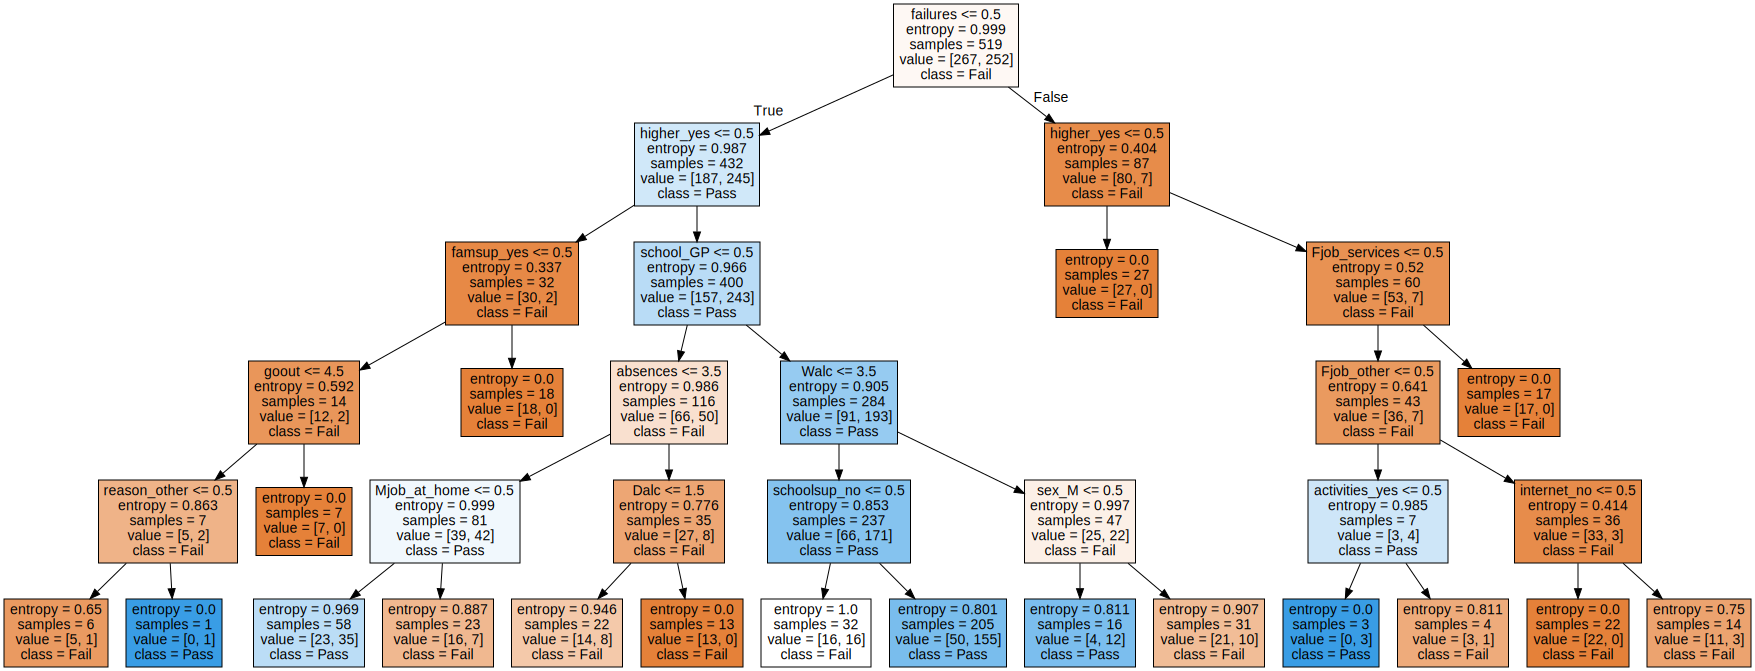

In [ ]:
# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
# 16. Save the tree to a .png file
graph.render(filename=r"decision_tree.png")


'decision_tree.png.png'

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 18. Print out two accuracy scores
print("\nTraining Accuracy: ", accuracy_score(y_train_juan, pipeline_juan.predict(X_train_juan)))
print("\nTest Accuracy: ", accuracy_score(y_test_juan, pipeline_juan.predict(X_test_juan)))



Training Accuracy:  0.7630057803468208

Test Accuracy:  0.7384615384615385


In [ ]:
# 19. Use the model to predict the test data and printout the accuracy, precision, recall scores and the confusion matrix
y_pred_juan = pipeline_juan.predict(X_test_juan)
print("\nAccuracy: ", accuracy_score(y_test_juan, y_pred_juan))
print("Precision: ", precision_score(y_test_juan, y_pred_juan))
print("Recall: ", recall_score(y_test_juan, y_pred_juan))
print("Confusion Matrix: \n", confusion_matrix(y_test_juan, y_pred_juan))


Accuracy:  0.7384615384615385
Precision:  0.8
Recall:  0.7368421052631579
Confusion Matrix: 
 [[40 14]
 [20 56]]


In [ ]:
# FINE TUNE THE MODEL:
from sklearn.model_selection import RandomizedSearchCV
import joblib

# 20. Using randomized grid search fine tune your model
parameters = {'classifier__max_depth': range(1, 30, 2), 'classifier__min_samples_leaf': range(1, 15, 3)}
random_search = RandomizedSearchCV(estimator=pipeline_juan, param_distributions=parameters, scoring='accuracy', cv=5, n_iter=7, refit=True, verbose=3, random_state=92)


In [ ]:
# 21. Fit your training data to the grid search object
random_search.fit(X_train_juan, y_train_juan)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END classifier__max_depth=17, classifier__min_samples_leaf=1;, score=0.635 total time=   0.0s
[CV 2/5] END classifier__max_depth=17, classifier__min_samples_leaf=1;, score=0.587 total time=   0.0s
[CV 3/5] END classifier__max_depth=17, classifier__min_samples_leaf=1;, score=0.625 total time=   0.0s
[CV 4/5] END classifier__max_depth=17, classifier__min_samples_leaf=1;, score=0.683 total time=   0.0s
[CV 5/5] END classifier__max_depth=17, classifier__min_samples_leaf=1;, score=0.592 total time=   0.0s
[CV 1/5] END classifier__max_depth=3, classifier__min_samples_leaf=1;, score=0.644 total time=   0.0s
[CV 2/5] END classifier__max_depth=3, classifier__min_samples_leaf=1;, score=0.721 total time=   0.0s
[CV 3/5] END classifier__max_depth=3, classifier__min_samples_leaf=1;, score=0.692 total time=   0.0s
[CV 4/5] END classifier__max_depth=3, classifier__min_samples_leaf=1;, score=0.702 total time=   0.0s
[CV 5/5] END clas

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               'passthrough',
                                                                               ['age',
                                                                                'Medu',
                                                                                'Fedu',
                                                                                'traveltime',
                                                                                'studytime',
                                                                                'failures',
                                                                                'famrel',
                                                                                'freetime',
                                                                                'goout',
                                                                                'Dalc',
                                                                                'Walc',
                                                                                'health',
                                                                                'absences']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['school',
                                                                                'sex',
                                                                                'address',
                                                                                'famsize',
                                                                                'Pstatus',
                                                                                'Mjob',
                                                                                'Fjob',
                                                                                'reason',
                                                                                'guardian',
                                                                                'schoolsup',
                                                                                'famsup',
                                                                                'paid',
                                                                                'activities',
                                                                                'nursery',
                                                                                'higher',
                                                                                'internet',
                                                                                'romantic'])])),
                                             ('classifier',
                                              DecisionTreeClassifier(criterion='entropy',
                                                                     max_depth=5))]),
                   n_iter=7,
                   param_distributions={'classifier__max_depth': range(1, 30, 2),
                                        'classifier__min_samples_leaf': range(1, 15, 3)},
                   random_state=92, scoring='accuracy', verbose=3)

In [ ]:
# 22. Print out the best parameters
print("\nBest Parameters: ")
print(random_search.best_params_)


Best Parameters: 
{'classifier__min_samples_leaf': 4, 'classifier__max_depth': 3}


In [ ]:
# 23. Print out the score of the model
print("\nBest Score: ")
print(random_search.best_score_)


Best Score: 
0.6955937266616878


In [ ]:
# 24. Printout the best estimator
print("\nBest Estimator: ")
print(random_search.best_estimator_)


Best Estimator: 
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                  

In [ ]:
# 25. Fit the test data using the fine-tuned model
best_model = random_search.best_estimator_
best_model.fit(X_train_juan, y_train_juan)
y_pred_juan_best = best_model.predict(X_test_juan)

In [ ]:
# 26. Printout the precision, re_call and accuracy.
print("\nBest Model Accuracy: ", accuracy_score(y_test_juan, y_pred_juan_best))
print("Best Model Precision: ", precision_score(y_test_juan, y_pred_juan_best))
print("Best Model Recall: ", recall_score(y_test_juan, y_pred_juan_best))


Best Model Accuracy:  0.7076923076923077
Best Model Precision:  0.75
Best Model Recall:  0.75


In [ ]:
# 27. Save the model using the joblib(dump)
joblib.dump(best_model, 'best_model.pkl')
# 28. Save the full pipeline using the joblib - (dump)
joblib.dump(pipeline_juan, 'full_pipeline.pkl')


['full_pipeline.pkl']

Text(0.5, 1.0, 'Confusion Matrix')

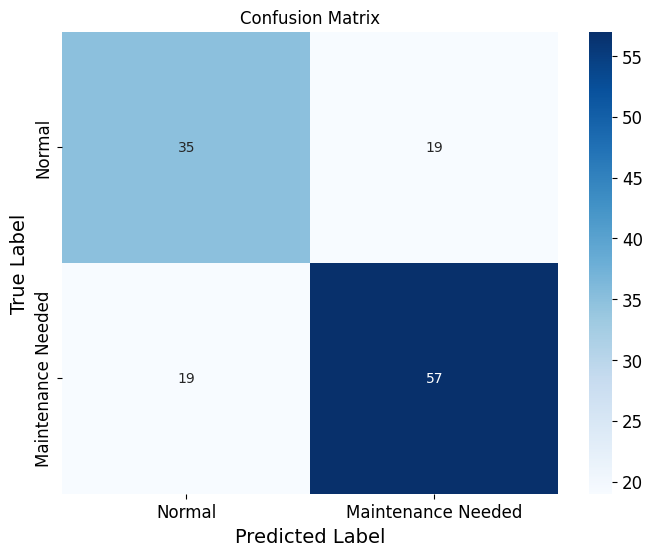

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming 'y_test' and 'y_pred' are available from the previously run model

# 1. Confusion Matrix
cm = confusion_matrix(y_test_juan, y_pred_juan_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Maintenance Needed'], yticklabels=['Normal', 'Maintenance Needed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

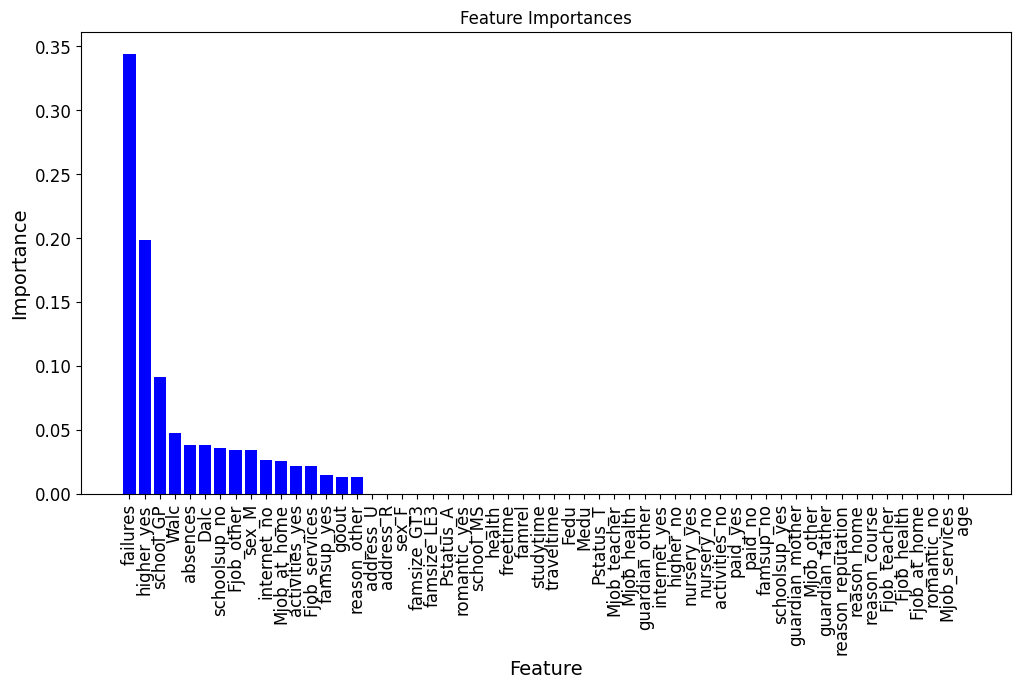

In [ ]:
# 2. Feature Importance
def plot_feature_importance(model, feature_names):
    importances = model.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12,6))
    plt.title('Feature Importances')
    plt.bar(range(len(indices)), importances[indices], color='b', align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

# Get feature names from the pipeline
feature_names = numeric_features_juan + list(pipeline_juan.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_features_juan))
plot_feature_importance(pipeline_juan, feature_names)

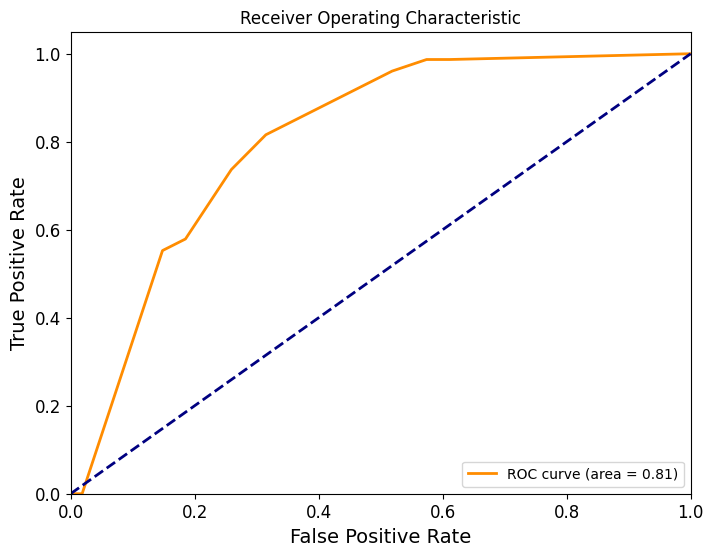

In [ ]:
# 3. ROC Curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Get scores if the model has predict_proba method
if hasattr(pipeline_juan.named_steps['classifier'], "predict_proba"):
    y_scores_juan = pipeline_juan.predict_proba(X_test_juan)[:, 1]  # scores for the positive class
    plot_roc_curve(y_test_juan, y_scores_juan)
else:
    print("The classifier does not support probability estimates")